# Based on Engstrom 2008 (ANCORA)

In [1]:
import constants

import csv
import seaborn as sns
import pandas as pd

sns.set_context(constants.sns_context)
sns.set_style(constants.sns_style)

In [17]:
import io

ancora_csv = """
min_homology,min_size,human_vs_mouse,human_vs_chicken,human_vs_zebrafish,zebrafish_vs_tetraodon
80,30,,125174,19596,57681
90,30,,78831,8260,26157
96,30,305015,50478,3656,10205
100,30,150487,35338,1721,4737
70,50,,93162,16725,45828
80,50,,63304,7169,25997
90,50,265537,36794,3127,8610
95,50,107860,22530,1228,3078
98,50,68600,17579,763,1782
100,50,34785,11934,330,754
90,100,81065,15339,733,1695
95,100, 25801, 7901, 188, 450
100,100,4919, 2475, 20, 61
100,200,494,365,0, 2
"""

ancora_df = pd.read_csv(io.StringIO(ancora_csv))
ancora_df = ancora_df.melt(id_vars=["min_homology", "min_size"], var_name="dataset", value_name="count")
ancora_df = ancora_df.rename(columns={"min_size": "Min. UCE length", "dataset": "Comparison"})
ancora_df["Comparison"] = ancora_df["Comparison"].astype('category')
comparison_mapping = {'human_vs_chicken': 'Human vs. chicken', 'human_vs_mouse': 'Human vs. mouse', 'human_vs_zebrafish': 'Human vs. zebrafish', 'zebrafish_vs_tetraodon': 'Zebrafish vs. tetraodon'}
ancora_df["Comparison"] = ancora_df["Comparison"].map(comparison_mapping)


In [14]:
ancora_df.dtypes

min_homology          int64
Min. UCE length       int64
Comparison         category
count               float64
dtype: object

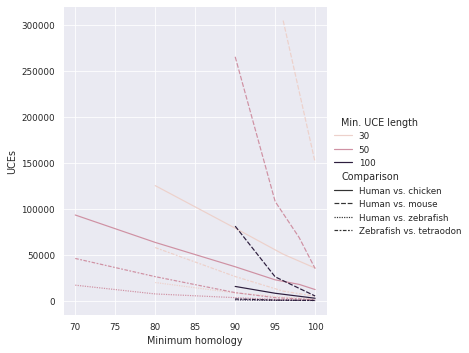

In [18]:
import os
p = sns.relplot(data=ancora_df[ancora_df["Min. UCE length"] != 200], x="min_homology", y="count", hue="Min. UCE length", kind="line", style="Comparison")

p.set_axis_labels("Minimum homology", "UCEs")
p.savefig(os.path.join(constants.image_out_dir, "cns_stats.pdf"))
